In [1]:
from ast import literal_eval

# import data preparation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# import SQL dependencies
import sqlite3

In [2]:
ez = pd.read_csv(r'C:\Users\Vivek Rao\Desktop\Programming\nyt-sudoku\data-visualization\nyt-sudoku-viz\src\data\easy.csv')
ez = ez.drop_duplicates()

In [3]:
perf = pd.read_csv(r'C:\Users\Vivek Rao\Desktop\Programming\nyt-sudoku\data-visualization\nyt-sudoku-viz\src\data\doks_performance.csv')
perf = perf.drop_duplicates()

In [4]:
ez['date'] = pd.to_datetime(ez['date'])

In [5]:
perf['date'] = pd.to_datetime(perf['date'])

In [6]:
merged = pd.merge(perf, ez, left_on='date', right_on='date', how='inner')

In [7]:
merged = merged[['date', 'doks_order', 'solution']]
merged.head()
# the dataframe only has 84 matches, not 100

,date,doks_order,solution
0,2023-01-23,"[70, 59, 3, 54, 11, 10, 20, 18, 13, 12, 24, 26...","[7, 5, 2, 6, 4, 8, 1, 3, 9, 6, 1, 3, 2, 9, 7, ..."
1,2023-01-25,"[15, 64, 27, 46, 18, 12, 6, 17, 34, 43, 29, 49...","[1, 5, 9, 3, 2, 4, 7, 8, 6, 6, 4, 8, 7, 9, 5, ..."
2,2023-02-02,"[20, 36, 21, 2, 10, 11, 19, 26, 8, 5, 41, 45, ...","[2, 3, 4, 8, 1, 9, 6, 5, 7, 8, 5, 7, 3, 2, 6, ..."
3,2023-02-03,"[3, 25, 42, 47, 73, 68, 74, 45, 67, 61, 59, 63...","[3, 4, 6, 1, 2, 7, 8, 5, 9, 1, 2, 5, 9, 6, 8, ..."
4,2023-02-05,"[18, 72, 27, 52, 5, 39, 44, 50, 37, 48, 53, 59...","[5, 2, 6, 7, 1, 3, 4, 9, 8, 8, 3, 4, 2, 5, 9, ..."


## Mistakes

To find mistakes, we look for duplicate cell indices. Before we begin, let's use data from the ```perf``` table. We do this because 16 rows were dropped when merging with ```ez```.

_Why were they dropped? It's because there wasn't a match with the original solution, i.e., RPi didn't collect grid information for those puzzles._

In [8]:
garland_data = pd.DataFrame(perf.doks_order.apply(literal_eval).tolist())
garland_data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,70,59,3,54,11,10,20,18,13,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,57,56,69,67,74,9,1,2,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,64,27,46,18,12,6,17,34,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,36,21,2,10,11,19,26,8,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,25,42,47,73,68,74,45,67,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
garland_data.to_csv('garland_data__values.csv', index=False)

In [9]:
def highlight_duplicates(row):
    row = row.T
    row = row.dropna()
    
    # flag every instance but the first
    # that an index is repeated
    row = row.duplicated()
    
    return row

In [10]:
garland_data

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,70,59,3,54,11,10,20,18,13,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,57,56,69,67,74,9,1,2,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,64,27,46,18,12,6,17,34,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,36,21,2,10,11,19,26,8,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,25,42,47,73,68,74,45,67,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,15,52,63,58,37,29,47,0,50,...,73.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,9,0,1,80,24,12,5,14,21,16,...,65.0,47.0,29.0,65.0,46.0,32.0,50.0,76.0,67.0,66.0
97,62,24,4,3,7,0,72,45,45,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,24,35,70,14,23,10,29,27,32,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mistake_mask = garland_data.T.apply(highlight_duplicates).T

In [13]:
mistake_mask.fillna(99).astype(int)
# mistake_mask.to_csv('garland__mistakes.csv', index=False)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
1,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
2,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
3,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
4,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,99,99,99,99,99,99,99,99
96,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,1
97,0,0,0,0,0,0,0,0,1,0,...,99,99,99,99,99,99,99,99,99,99
98,0,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99


In [14]:
garland__times = pd.DataFrame(perf.times.apply(literal_eval).tolist())

In [10]:
garland__times.to_csv('garland__times.csv', index=False)

In [15]:
time_spent_fixing_mistakes = garland__times[mistake_mask].sum(axis=1)

In [28]:
time_spent_fixing_mistakes

0      0.000
1      1.425
2      0.000
3      3.917
4      5.227
       ...  
95    31.423
96    57.508
97     2.223
98     5.797
99     1.953
Length: 100, dtype: float64

In [33]:
time_spent_fixing_mistakes_by_date = pd.DataFrame({'date': np.array(perf.date), 'times': time_spent_fixing_mistakes})

In [53]:
time_spent_fixing_mistakes_by_date['text_times'] = time_spent_fixing_mistakes_by_date.times.apply(round).astype(str).apply(lambda x: "00:"+x.zfill(2))

In [58]:
time_spent_fixing_mistakes_by_date.text_times = time_spent_fixing_mistakes_by_date.times.astype(str).apply(lambda x: "00:"+x.zfill(2))

(array([37., 14., 10.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([3.00000e-03, 5.75350e+00, 1.15040e+01, 1.72545e+01, 2.30050e+01,
        2.87555e+01, 3.45060e+01, 4.02565e+01, 4.60070e+01, 5.17575e+01,
        5.75080e+01]),
 <BarContainer object of 10 artists>)

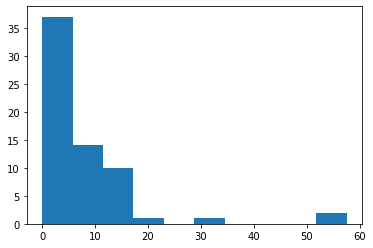

In [67]:
plt.hist(time_spent_fixing_mistakes[time_spent_fixing_mistakes!=0])

In [73]:
np.median(time_spent_fixing_mistakes[time_spent_fixing_mistakes!=0])

5.101

In [60]:
time_spent_fixing_mistakes_by_date.to_csv('timeSpentFixingMistakesByDate.csv', index=False)

(array([37., 14., 10.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([3.00000e-03, 5.75350e+00, 1.15040e+01, 1.72545e+01, 2.30050e+01,
        2.87555e+01, 3.45060e+01, 4.02565e+01, 4.60070e+01, 5.17575e+01,
        5.75080e+01]),
 <BarContainer object of 10 artists>)

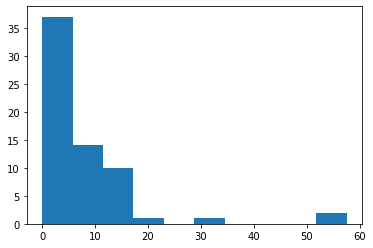

In [168]:
plt.hist(time_spent_fixing_mistakes[time_spent_fixing_mistakes!=0])

In [75]:
np.median(time_spent_fixing_mistakes[time_spent_fixing_mistakes!=0])

5.101

(array([72., 14., 10.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([ 0.    ,  5.7508, 11.5016, 17.2524, 23.0032, 28.754 , 34.5048,
        40.2556, 46.0064, 51.7572, 57.508 ]),
 <BarContainer object of 10 artists>)

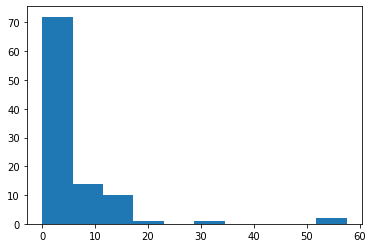

In [184]:
plt.hist(time_spent_fixing_mistakes)

In [83]:
# what percent of time_spent_fixing_mistakes takes under
# six seconds?
np.percentile(time_spent_fixing_mistakes, 49.75)

2.4911849999999998

### What indices to I tend to make mistakes in?

In [182]:
garland_data[mistake_mask].apply(pd.Series.value_counts).sum()

0     0.0
1     0.0
2     4.0
3     1.0
4     5.0
5     1.0
6     1.0
7     2.0
8     4.0
9     0.0
10    0.0
11    2.0
12    1.0
13    3.0
14    4.0
15    3.0
16    4.0
17    5.0
18    4.0
19    3.0
20    6.0
21    2.0
22    5.0
23    7.0
24    2.0
25    3.0
26    6.0
27    6.0
28    3.0
29    1.0
30    3.0
31    3.0
32    4.0
33    2.0
34    2.0
35    3.0
36    5.0
37    6.0
38    8.0
39    6.0
40    7.0
41    7.0
42    8.0
43    5.0
44    8.0
45    5.0
46    2.0
47    2.0
48    2.0
49    3.0
50    1.0
51    2.0
52    2.0
53    1.0
54    1.0
55    0.0
56    2.0
57    2.0
58    2.0
dtype: float64

# Numbers

In [8]:
# convert string of lists to lists
merged.doks_order = merged.doks_order.apply(literal_eval)
merged.solution = merged.solution.apply(literal_eval)

In [9]:
# write a function that, given an order list and a solution list,
# returns a list of values filled out in order
def get_cell_value(order, solution):
    order_of_values = []
    
    for index in order:
        value = solution[index]
        order_of_values.append(value)
    
    print(order_of_values)
    return order_of_values

In [10]:
# create a DataFrame to track all values filled out in order
# rows are puzzles
# columns as indices
# this DataFrame will only have 84 rows because you need the
# solutions to pick out numbers

# 52 is the max number of values in any sudoku
# find a way to make this dynamic
values_df = pd.DataFrame(columns=np.arange(52))

for index, row in merged.iterrows():
    order = row['doks_order']
    solution = row['solution']

    values = get_cell_value(order,solution)
    
    # pad the list
    values += [0] * (52 - len(values))
    
    values_df.loc[len(values_df)] = values

[8, 6, 6, 3, 3, 1, 4, 9, 9, 2, 6, 2, 1, 3, 9, 3, 3, 1, 5, 7, 7, 7, 9, 5, 4, 8, 8, 1, 6, 1, 8, 2, 1, 9, 6, 2, 4, 4, 2, 4, 2, 2, 5]
[1, 1, 4, 6, 7, 7, 7, 2, 2, 1, 1, 1, 1, 2, 6, 6, 3, 7, 8, 9, 5, 3, 8, 4, 8, 9, 2, 3, 5, 8, 3, 7, 9, 5, 8, 5, 5, 4, 3, 9, 6, 3, 6]
[1, 7, 4, 4, 5, 7, 6, 2, 7, 9, 1, 1, 8, 2, 4, 5, 5, 8, 8, 6, 3, 2, 3, 8, 4, 6, 6, 2, 5, 7, 9, 1, 2, 8, 9, 5, 5, 5, 5, 6, 2, 6, 6, 3, 4]
[1, 1, 1, 1, 1, 1, 9, 6, 8, 8, 2, 2, 3, 6, 8, 4, 6, 4, 2, 9, 2, 4, 4, 4, 4, 5, 8, 9, 3, 5, 7, 7, 5, 6, 5, 3, 3, 7, 7, 5, 4, 5, 4, 6, 9]
[1, 3, 7, 7, 3, 3, 1, 2, 5, 6, 5, 6, 6, 6, 6, 6, 2, 7, 7, 8, 5, 9, 9, 8, 9, 4, 4, 2, 7, 7, 2, 8, 2, 9, 5, 8, 5, 9, 8, 9, 1, 1, 5]
[8, 5, 5, 2, 4, 5, 9, 7, 5, 7, 1, 5, 5, 5, 4, 6, 8, 9, 1, 3, 4, 8, 9, 3, 4, 6, 6, 5, 1, 1, 1, 8, 3, 7, 7, 7, 9, 9, 3, 5, 3, 9, 3, 1, 4]
[7, 4, 4, 3, 3, 3, 5, 1, 1, 8, 9, 6, 2, 6, 8, 8, 2, 6, 2, 5, 4, 7, 7, 2, 4, 8, 5, 9, 5, 7, 6, 8, 9, 8, 1, 3, 2, 2, 6, 4, 7, 2, 3]
[1, 1, 2, 2, 4, 8, 8, 4, 4, 3, 5, 7, 6, 7, 6, 3, 9, 1, 5, 1, 5, 4, 4, 7,

In [11]:
values_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,8,6,6,3,3,1,4,9,9,2,...,5,0,0,0,0,0,0,0,0,0
1,1,1,4,6,7,7,7,2,2,1,...,6,0,0,0,0,0,0,0,0,0
2,1,7,4,4,5,7,6,2,7,9,...,6,3,4,0,0,0,0,0,0,0
3,1,1,1,1,1,1,9,6,8,8,...,4,6,9,0,0,0,0,0,0,0
4,1,3,7,7,3,3,1,2,5,6,...,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2,7,2,2,2,1,1,1,1,4,...,3,6,6,6,8,6,0,0,0,0
80,7,7,5,8,8,8,5,1,1,6,...,3,4,6,3,5,6,3,4,5,0
81,7,4,7,4,2,9,4,3,3,7,...,3,7,0,0,0,0,0,0,0,0
82,8,3,3,4,5,5,1,8,9,3,...,3,9,9,0,0,0,0,0,0,0


In [26]:
np.unique(values_df.iloc[:,0].values, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array([32,  4,  6,  7,  3,  7, 16,  5,  4], dtype=int64))

TypeError: unsupported operand type(s) for +: 'int' and 'builtin_function_or_method'

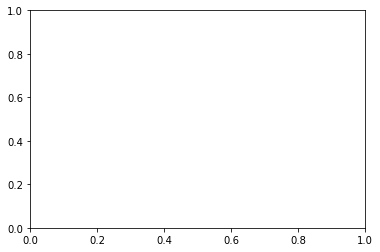

In [18]:
plt.bar(x=values_df.iloc[:,0].values, height=sum)

### What about patterns in what numbers come prefilled?

In [206]:
# convert every prefilled grid to a dataframe
ez_prefilled_numbers = pd.DataFrame(ez.puzzle.apply(literal_eval).tolist())
ez_prefilled_numbers = ez_prefilled_numbers.replace(0, np.nan)

In [257]:
ez_prefilled_numbers.values[:,0:27]

array([[ 7.,  5.,  2., ..., nan,  7., nan],
       [ 1.,  5., nan, ...,  4.,  5.,  9.],
       [ 1., nan,  5., ...,  1.,  9.,  3.],
       ...,
       [nan, nan,  2., ...,  9.,  7., nan],
       [nan,  9.,  5., ...,  9., nan, nan],
       [nan,  9., nan, ...,  7.,  8., nan]])

In [259]:
np.unique(ez_prefilled_numbers.values[:,0:27], return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., nan]),
 array([ 782,  766,  809,  717,  731,  732,  743,  781,  725, 6579],
       dtype=int64))

In [242]:
range(81)

range(0, 81)

In [220]:
ez_prefilled_numbers.loc[0,:].value_counts()

7.0    6
5.0    6
8.0    5
4.0    4
6.0    4
3.0    4
9.0    4
1.0    3
2.0    2
Name: 0, dtype: int64